In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
# An important idea in all machine learning algorithms is looping 
# in TensorFlow we can use a variable as the upper bound is these loops
# Example
x = tf.Variable(0., name='x')
threshold = tf.constant(5.)

model = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(model)
    while session.run(tf.less(x, threshold)):
        x = x + 1
        print(session.run(x))

1.0
2.0
3.0
4.0
5.0


Predicted model: 2.035x + 5.812


/Users/cian/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


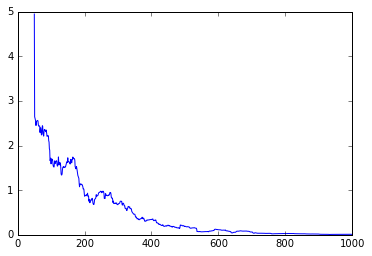

In [14]:
# Example of training a model of the form y = a*x + b by using
# gradient descent to minimise error

x = tf.placeholder("float")
y = tf.placeholder("float")
# This function can only optimise 1 parameter but we make this parameter
# an array to include both a and b the 2 parameters we are trying to estimate
w = tf.Variable([1.0, 2.0], name="w")

# Define the model and the error
y_model = tf.mul(x, w[0]) + w[1]
error = tf.square(y - y_model)

# Then minimise this with gradient descent
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

errors = []

model = tf.initialize_all_variables()
with tf.Session() as session:
    session.run(model)
    for i in range(1000):
        x_train = tf.random_normal((1,), mean=5, stddev=2.0)
        y_train = x_train * 2 + 6
        x_value, y_value = session.run([x_train, y_train])
        _,error_value = session.run([train_op, error], feed_dict={x: x_value, y: y_value})
        errors.append(error_value)
    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))

# plot the errors  
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()